**PROBLEM STATEMENT**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

1.importing neccessary Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
#reading data and converting it into dataFrame
data=pd.read_csv('/content/drive/MyDrive/data reading files/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**2.Exploratory Data Analysis**

In [153]:
data.columns=['cid','gender','age','income','score']
data.set_index('cid',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
 1   age     200 non-null    int64 
 2   income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [154]:
data.isnull().sum()

gender    0
age       0
income    0
score     0
dtype: int64

In [155]:
data.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [156]:
def removing_outliers(data,x_):
  q25,q75=np.percentile(data[x_],[25,75])
  iqr=q75-q25
  min_o=q25-(1.5*iqr)
  max_o=q75+(1.5*iqr)
  ad=[x for x in data[x_] if x>min_o and x<max_o]
  print(len(ad),ad)
  return ad

In [157]:
ad=removing_outliers(data,'age')
data=data[data['age'].isin(ad)]
ad=removing_outliers(data,'income')
data=data[data['income'].isin(ad)]
ad=removing_outliers(data,'score')
data=data[data['score'].isin(ad)]

200 [19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18, 49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49, 33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68, 19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21, 48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49, 67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51, 50, 27, 38, 40, 39, 23, 31, 43, 40, 59, 38, 47, 39, 25, 31, 20, 29, 44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44, 38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32, 40, 28, 36, 36, 52, 30, 58, 27, 59, 35, 37, 32, 46, 29, 41, 30, 54, 28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30]
198 [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33, 33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



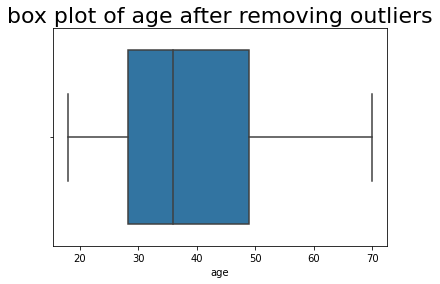

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



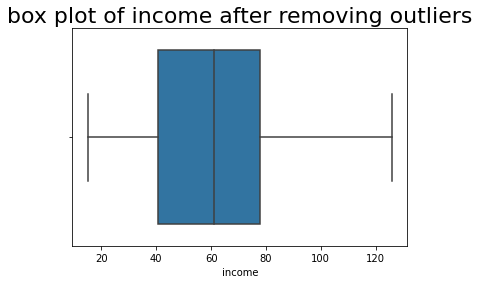

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



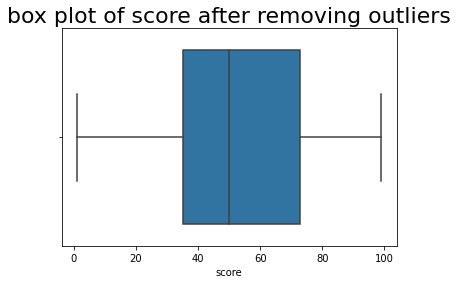

In [158]:
for i in data.columns[1:]:
  sns.boxplot(data[i])
  plt.title(f"box plot of {i} after removing outliers", fontsize = 22)
  plt.show()

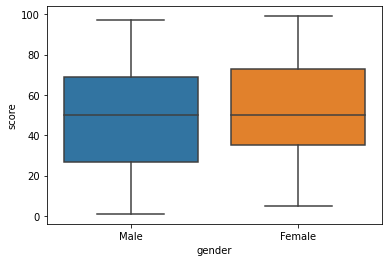

In [159]:
sns.boxplot(y='score',x='gender',data=data)

**Note** from this we can say that the scores given are pretty high for female.

In [160]:
data.corr()

,age,income,score
age,1.000000,0.004406,-0.329421
income,0.004406,1.000000,0.010080
score,-0.329421,0.010080,1.000000


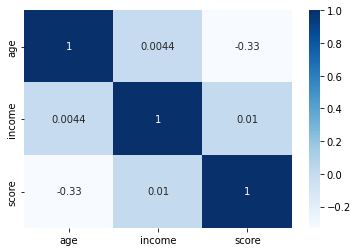

In [161]:
sns.heatmap(data.corr(),cmap='Blues',annot=True)

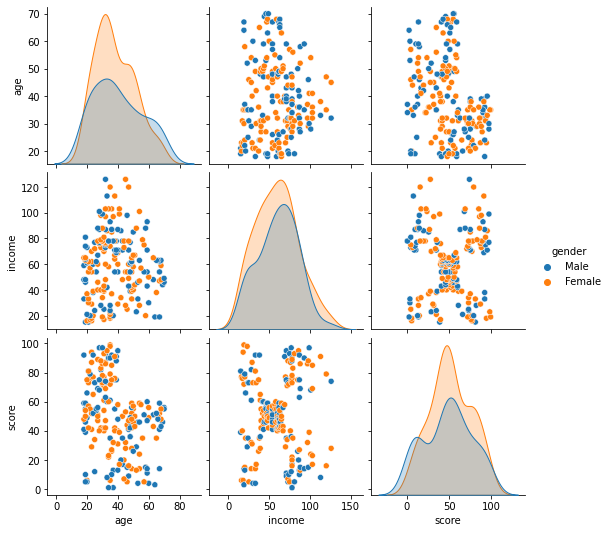

In [162]:
sns.pairplot(data,hue='gender')

**Note**: from this we can say that there is no multi collinearity and there is somewhat negative correlation between age and score.

In [163]:
data.drop('gender',axis=1,inplace=True)
data

,age,income,score
cid,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
194,38,113,91
195,47,120,16
196,35,120,79


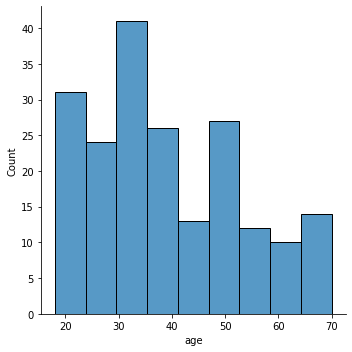

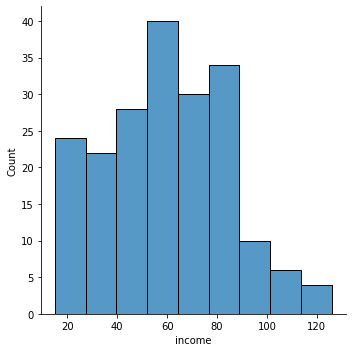

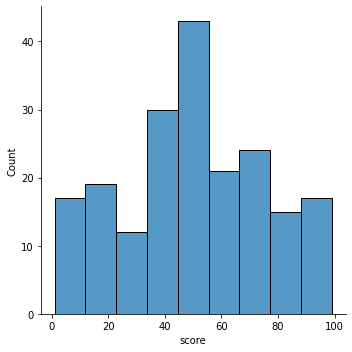

In [164]:
for i in data.columns:
  sns.displot(data[i])

**KMEANS Clustering**

In [165]:
np.random.seed(0)

In [166]:
X=data[["age",'income','score']]
X.head()

,age,income,score
cid,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model =KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
print("Inertia:", inertia_errors)
print("Silhouette Scores:", silhouette_scores)

Inertia: [200578.87719298247, 138080.80227017772, 99104.20215403376, 70156.88335602352, 53133.13742109285, 47651.03140605525, 42725.23708777533, 39051.01045751634, 35455.72866037012, 32658.85662521387, 30604.05901875902]
Silhouette Scores: [0.2966221199277427, 0.3794966083348183, 0.40775328174434056, 0.44863190451683665, 0.45984228955477996, 0.44123985934812643, 0.4121097339040357, 0.3765078994526291, 0.3713731309188319, 0.3598211092798854, 0.36951823270159395]


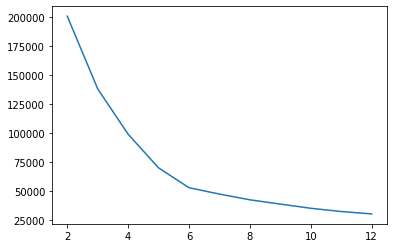

In [170]:
sns.lineplot(x=n_clusters, y=inertia_errors)

For n_clusters = 2 The average silhouette_score is : 0.2966221199277427
For n_clusters = 3 The average silhouette_score is : 0.3794966083348183
For n_clusters = 4 The average silhouette_score is : 0.40775328174434056
For n_clusters = 5 The average silhouette_score is : 0.44863190451683665
For n_clusters = 6 The average silhouette_score is : 0.45984228955477996


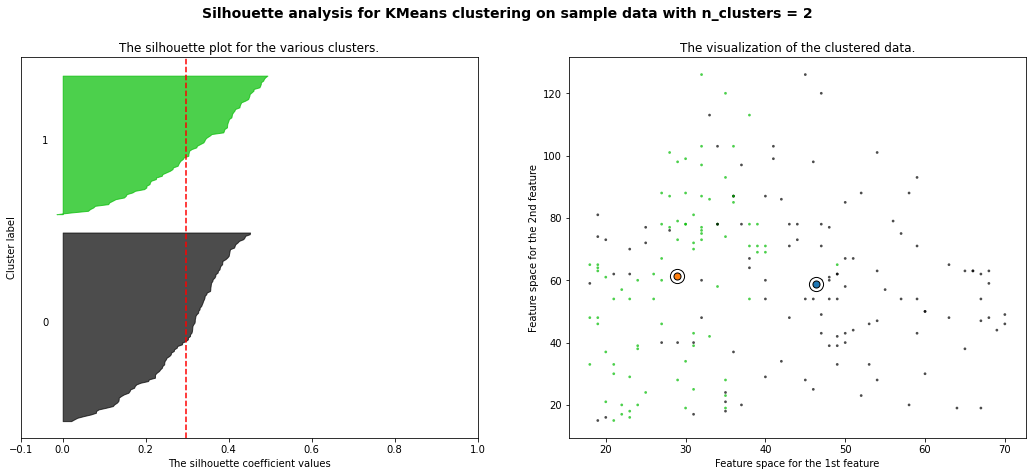

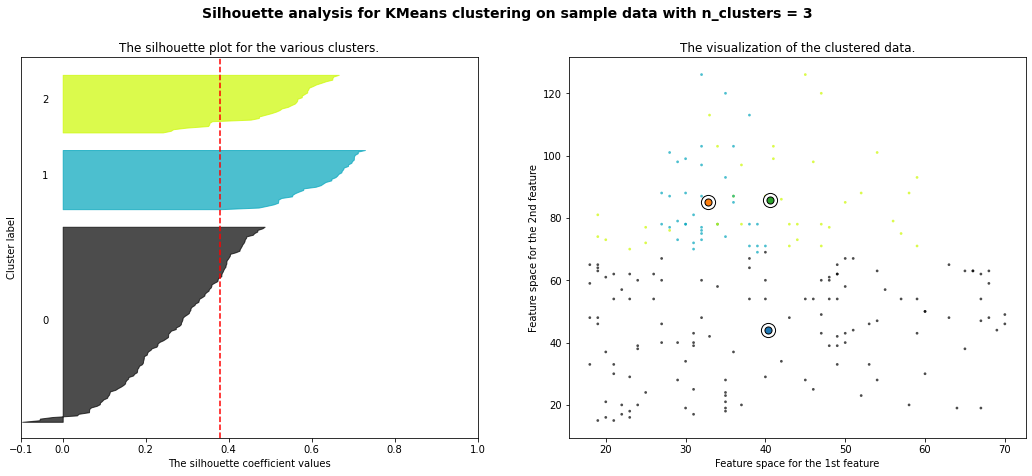

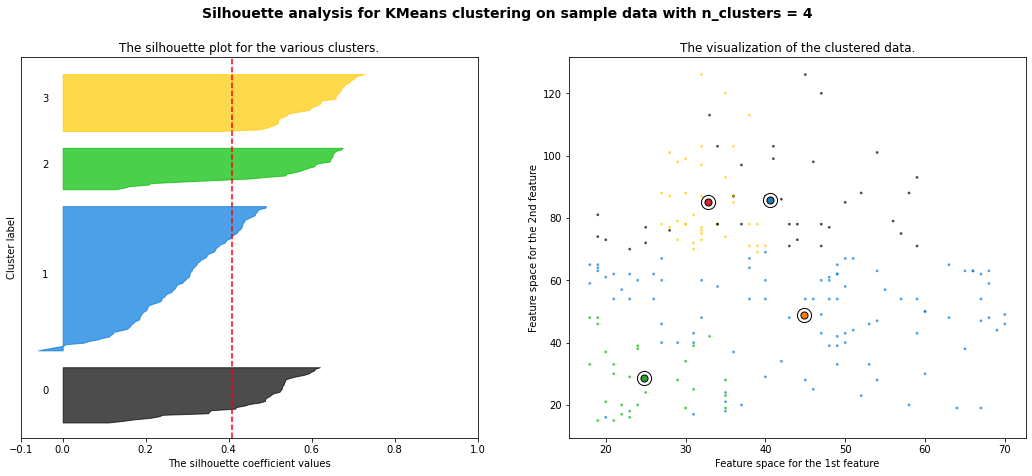

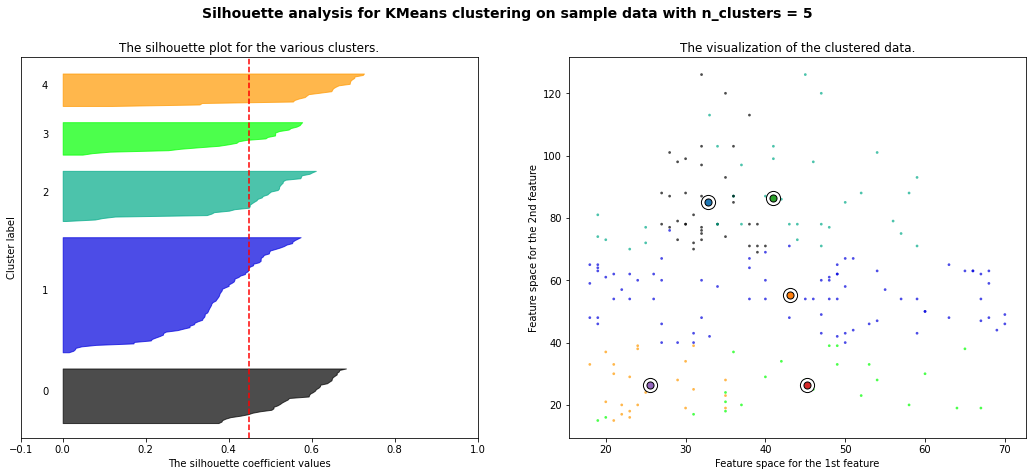

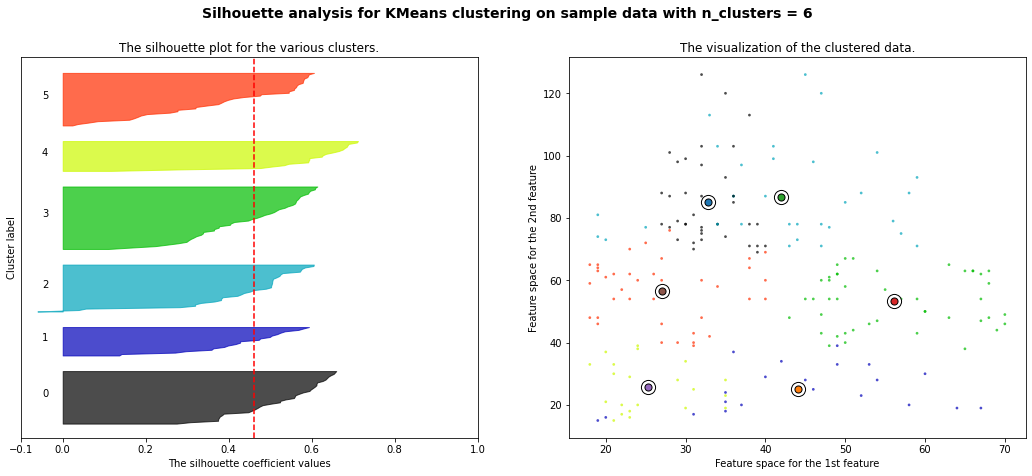

In [171]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Clusters Selection  :**  as per the elbow method we have to take 6 as our clusters but the silhoutte score diagram for 6 clusters indicate that there is spread in negative side so we are no selecting the clusters as 5 based on the second highest silhoutte score.

In [175]:
final_kmeans_model=KMeans(n_clusters=5)
Y_kmeans=final_kmeans_model.fit_predict(X)

In [176]:
data["label_kmeans"]=Y_kmeans

In [177]:
X["label"]=Y_kmeans

In [178]:
print(final_kmeans_model.cluster_centers_)

[[25.27272727 25.72727273 79.36363636]
 [42.9375     55.0875     49.7125    ]
 [32.76315789 85.21052632 82.10526316]
 [45.2173913  26.30434783 20.91304348]
 [40.91428571 86.34285714 17.57142857]]


In [179]:
data.head()

,age,income,score,label_kmeans
cid,,,,
1,19,15,39,3
2,21,15,81,0
3,20,16,6,3
4,23,16,77,0
5,31,17,40,3


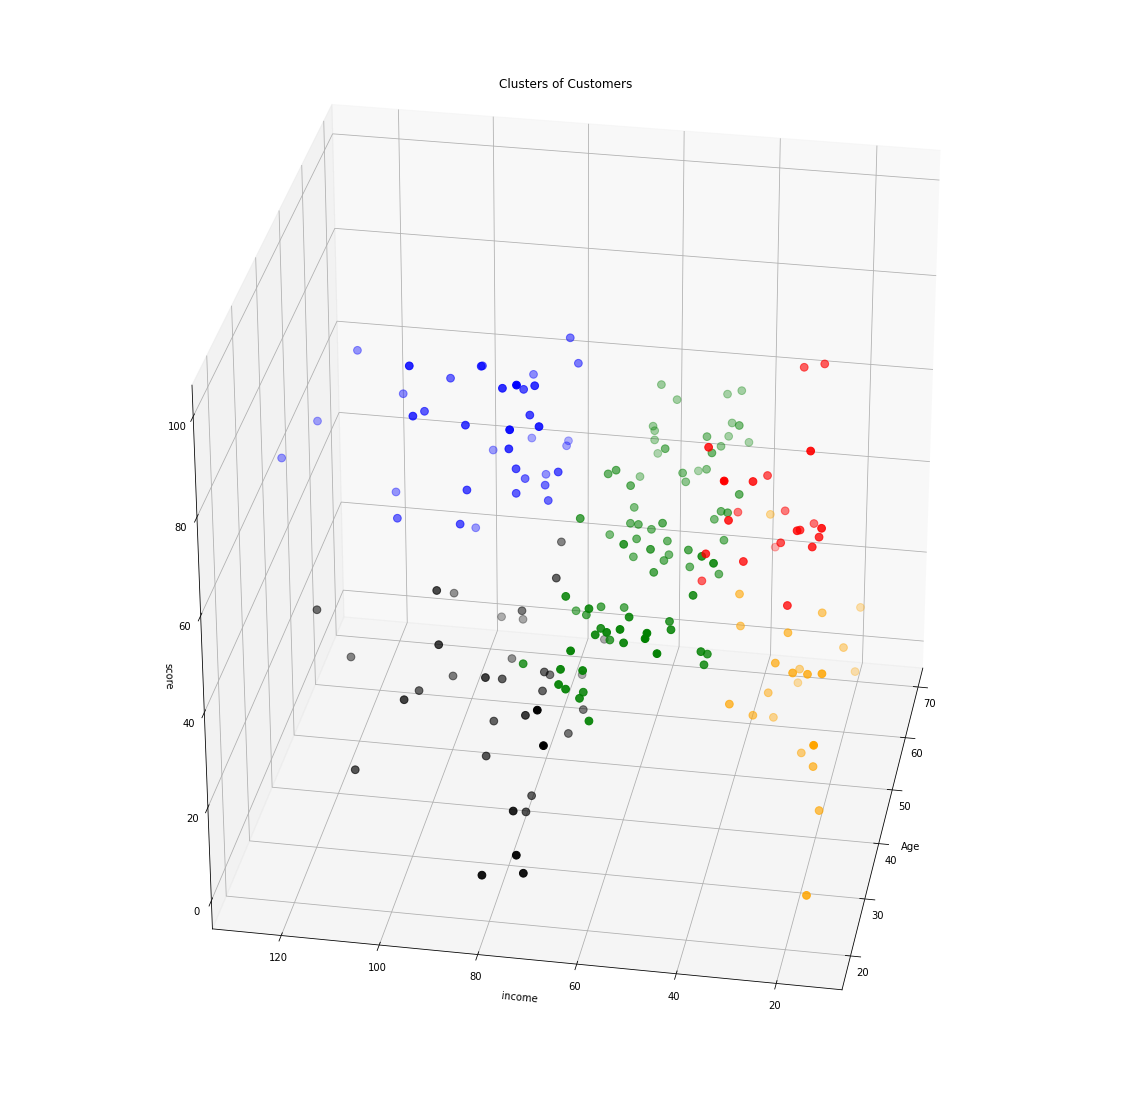

In [180]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.age[X.label==0],X['income'][X.label==0],X['score'][X.label==0], c='red',s=60)
ax.scatter(X.age[X.label==1],X['income'][X.label==1],X['score'][X.label==1], c='green',s=60)
ax.scatter(X.age[X.label==2],X['income'][X.label==2],X['score'][X.label==2], c='blue',s=60)
ax.scatter(X.age[X.label==3],X['income'][X.label==3],X['score'][X.label==3], c='orange',s=60)
ax.scatter(X.age[X.label==4],X['income'][X.label==4],X['score'][X.label==4], c='black',s=60)
ax.view_init(30,190)
plt.xlabel('Age')
plt.ylabel('income')
ax.set_zlabel('score')
plt.title('Clusters of Customers')

plt.show()


In [181]:
import plotly.express as px
fig = px.scatter_3d(X, x='age' , y='score' ,z='income',
                    color='label')
fig.show()

**KMEANS Clustering is giving shiloutte score as 0.44863190451683665 for 5 clusters**

**Hierarchical Clustering**

In [182]:
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

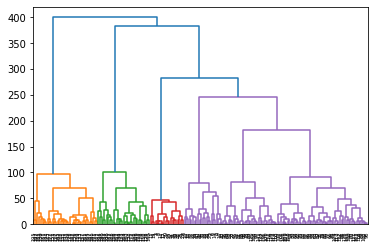

In [183]:
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))

In [184]:
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(X)
silhouette_score(X, hc.labels_)

0.4442182420211331

In [186]:
data["label_hierarchical"]=y_hc

In [187]:
data.head()

,age,income,score,label_kmeans,label_hierarchical
cid,,,,,
1,19,15,39,3,4
2,21,15,81,0,3
3,20,16,6,3,4
4,23,16,77,0,3
5,31,17,40,3,4


**HIERARCHICAL Clustering is giving shiloutte score as 0.4442199517310472**

**From the above silhoutte scores we can say that our KMEANS Clustering is best**

the given data is perfectly divided into different clusters so that we can perfectly analyze.